# [NTDS'18] milestone 3: spectral graph theory
[ntds'18]: https://github.com/mdeff/ntds_2018

[Michaël Defferrard](http://deff.ch), [EPFL LTS2](https://lts2.epfl.ch)

## Students

* Team: `<30>`
* Students: `<Tapparel Joachim, Tuuva Tim, Buchegger Anael, Biotto Lucas>`
* Dataset: `<Music Archive>`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The goal of this milestone is to get familiar with the graph Laplacian and its spectral decomposition.

## 0 Load your network

In [1]:
%matplotlib inline

If you get a `No module named 'sklearn'` error when running the below cell, install [scikit-learn](https://scikit-learn.org) with `conda install scikit-learn` (after activating the `ntds_2018` environment).

In [2]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Let's denote your graph as $\mathcal{G} = (\mathcal{V}, \mathcal{E}, A)$, where $\mathcal{V}$ is the set of nodes, $\mathcal{E}$ is the set of edges, $A \in \mathbb{R}^{N \times N}$ is the (weighted) adjacency matrix, and $N = |\mathcal{V}|$ is the number of nodes.

Import the adjacency matrix $A$ that you constructed in the first milestone.
(You're allowed to update it between milestones if you want to.)

In [3]:
adjacency = np.load('../data/fma_metadata/adjacency.npy') # the adjacency matrix

# We don't want to have some isolated node so we need to remove them!
# Remove line full of 0
adjacency = adjacency[~np.all(adjacency == 0, axis=1)]

# Remove column full of 0
adjacency = adjacency.T[~np.all(adjacency.T == 0, axis=1)]

n_nodes = adjacency.shape[0]  # the number of nodes in the network

## 1 Graph Laplacian

### Question 1

From the (weighted) adjacency matrix $A$, compute both the combinatorial (also called unnormalized) and the normalized graph Laplacian matrices.

Note: if your graph is weighted, use the weighted adjacency matrix. If not, use the binary adjacency matrix.

For efficient storage and computation, store these sparse matrices in a [compressed sparse row (CSR) format](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_.28CSR.2C_CRS_or_Yale_format.29).

In [4]:
D = np.diag(sum(adjacency)) #We put the degrees on the diagonal of a matrix full of zeros, this create the matrix D. 

#We compute the invert of the D matrix and then put it to the square in order to have 
#D^(-1/2) for the normalisation of the Laplacian
Dinv = np.linalg.inv(D)
Dinvsquare = Dinv**(1/2)

#We just create the combinatorial and the normalized Laplacian following the lecture given in class
laplacian_combinatorial = D-adjacency
laplacian_normalized = Dinvsquare@laplacian_combinatorial@Dinvsquare

Use one of them as the graph Laplacian $L$ for the rest of the milestone.
We however encourage you to run the code with both to get a sense of the difference!

In [5]:
#We give a correct name and we store both of the Laplacian in CSR format
laplacian_comb =  sparse.csr_matrix(laplacian_combinatorial)
laplacian_norm = sparse.csr_matrix(laplacian_normalized)

### Question 2

Compute the eigendecomposition of the Laplacian $L = U^\top \Lambda U$, where the columns $u_k \in \mathbb{R}^N$ of $U = [u_1, \dots, u_N] \in \mathbb{R}^{N \times N}$ are the eigenvectors and the diagonal elements $\lambda_k = \Lambda_{kk}$ are the corresponding eigenvalues.

Make sure that the eigenvalues are ordered, i.e., $0 = \lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_N$.

In [6]:
#Computation of the eigenvector and eigenvalues of the combinatorial Laplacian with a dense reprentation (with "toarray")
w1, v1 = np.linalg.eigh(laplacian_comb.toarray())

#Computation of the eigenvector and eigenvalues of the normalized Laplacian with a dense reprentation (with "toarray")
w2, v2 = np.linalg.eigh(laplacian_norm.toarray())

#We associate the eigenvector and the eigenvalues with a correct name
eigenvectors_comb = v1
eigenvalues_comb =  w1

#We associate the eigenvector and the eigenvalues with a correct name
eigenvectors_norm = v2
eigenvalues_norm =  w2

#Assertions in order to check if the matrixs of the eigenvectors have the correct size 
assert eigenvectors_comb.shape == (n_nodes, n_nodes)
assert eigenvectors_norm.shape == (n_nodes, n_nodes)

Justify your choice of eigensolver.

**Here, we take the eigensolver "np.linalg.eigh()" because we want to have all the the eigenvectors and the eigenvalues of our Laplacian Graph (we could have used the same kind of eigensolver given by scipy but that wouldn't have changed anything). We use this eigensolver because we have a symmetric matrix and we want the eigenvalues in an ascending order. We could have used an eigensolver for sparse matrix like "scipy.sparse.eigs" but in that case we don't compute all the eigenvectors and the eigenvalue. We will use this kind of eigensolver in the next section.**

### Question 3

We can write $L = S S^\top$. What is the matrix $S$? What does $S^\top x$, with $x \in \mathbb{R}^N$, compute?

**Your answer here.**

### Question 4

Show that $\lambda_k = \| S^\top u_k \|_2^2$, where $\| \cdot \|_2^2$ denotes the squared Euclidean norm (a.k.a. squared $L^2$ norm).

**Your answer here.**

What does the quantity $\| S^\top x \|_2^2$ tell us about $x$?

**Your answer here.**

### Question 5

What is the value of $u_1$, both for the combinatorial and normalized Laplacians?

**Your annswer here.**

### Question 6

Look at the spectrum of the Laplacian by plotting the eigenvalues.
Comment on what you observe.

Text(0.5, 1.0, 'Spectrum of the Normalized Laplacian')

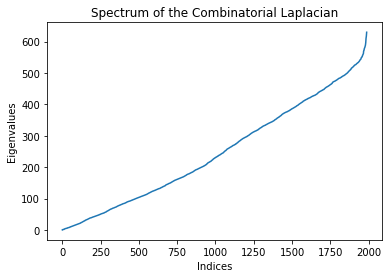

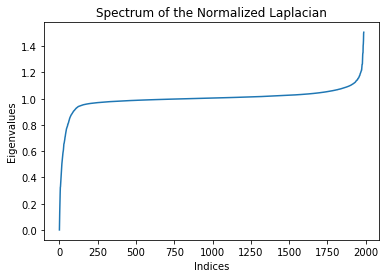

In [7]:
#We just plot our eigenvalues for the combinatorial Laplacian
plt.figure(0)
plt.plot(eigenvalues_comb)
plt.xlabel('Indices')
plt.ylabel('Eigenvalues')
plt.title('Spectrum of the Combinatorial Laplacian')

#We just plot our eigenvalues for the normalized Laplacian
plt.figure(1)
plt.plot(eigenvalues_norm)
plt.xlabel('Indices')
plt.ylabel('Eigenvalues')
plt.title('Spectrum of the Normalized Laplacian')

**We observe that the spectrum correctly represents that the eigenvalues are in ascending order for both representations. For the eigenvalues of the combinatorial Laplacian, we can see that the spectrum is pratically linear until the end where it seems to increase a lot. This is what we can expect from a classical graph. For the eigenvalues of the normalized Laplacian, we can see that we have a pratically flat line around 1. This effect clearly represent the effect of the normalisation.**

How many connected components are there in your graph? Answer using the eigenvalues only.

In [8]:
eigenvalues_comb

array([9.04022226e-14, 5.17538088e-01, 7.60845879e-01, ...,
       6.17433661e+02, 6.22270637e+02, 6.29875861e+02])

In [9]:
eigenvalues_norm

array([1.31565359e-16, 1.03689567e-01, 1.34046698e-01, ...,
       1.44232593e+00, 1.49718882e+00, 1.50624569e+00])

Is there an upper bound on the eigenvalues, i.e., what is the largest possible eigenvalue? Answer for both the combinatorial and normalized Laplacians.

**We can see that in our eigenvalues_comb vector we have just one value which is nearly zero ($\lambda_{1}=9.04022226\cdot10^{-14}$). As the next eigenvalue is far from zero, we can assume that there's only one zero in our eigenvalues vector so there is only one connected component. For the normalized Laplacian, we can see in the eigenvalues_norm that we have again only one value which is nearly zero ($\lambda_{1}=1.31565359\cdot10^{-16}$) so as we have already seen with the combinatorial Laplacian, there's only one connected component in our graph. Just by looking at the biggest eigenvalue for both of the combinatorial and normalized Laplacian, we can see that in that specific case we have an upper bound. But in fact, we can see that for both of the combinatorial and the normalized Laplacian, the eigenvalues seems to increase a lot when we reach the bigger eigenvalues so we can assume that in a realistic case we don't have an upper bound for this kind of graph. More precisely, we assume that with some other data but the same kind of graph, we could reach some eigenvalues which are bigger than the one we get here.**

## 3 Laplacian eigenmaps

*Laplacian eigenmaps* is a method to embed a graph $\mathcal{G}$ in a $d$-dimensional Euclidean space.
That is, it associates a vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$.
The graph $\mathcal{G}$ is thus embedded as $Z \in \mathbb{R}^{N \times d}$.


**Information : For the next steps, we will only use the normalized Laplacian because we find it better for our graph (after testing).**

### Question 7

What do we use Laplacian eigenmaps for? (Or more generally, graph embeddings.)

**We use Laplacian eigenmaps in order to have a visualisation of our graph. With the Laplacian eigenmaps we can have a 2D representation of our graph or a 3D representation wich can show some properties like the clusters or some other propreties (like the density of our graph, an idea of the number of element in our graph, etc). We can even use graph embedding just in order to extract some properties we didn't expect, without even making any visualisation (4D or more for example).**

### Question 8

Embed your graph in $d=2$ dimensions with Laplacian eigenmaps.
Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.

**Recompute** the eigenvectors you need with a partial eigendecomposition method for sparse matrices.
When $k \ll N$ eigenvectors are needed, partial eigendecompositions are much more efficient than complete eigendecompositions.
A partial eigendecomposition scales as $\Omega(k |\mathcal{E}|$), while a complete eigendecomposition costs $\mathcal{O}(N^3)$ operations.

In [10]:
#First we check if have only one connected component as have seen in the point six
import networkx as nx

nx.is_connected(nx.from_numpy_matrix(adjacency))

True

In [11]:
#As we only have one connected component we can now recompute the eigenvectors with eigensolver for the sparse 
#matrix (in order to have a faster computation).
#We only need the first three eigenvectors because we want d=2 dimension and the first eigenvector doesn't respect 
#the condition for the Laplacian eigenmaps (it's the constant eigenvector which give any information).

eigenvalue, eigenvector = scipy.sparse.linalg.eigsh(laplacian_norm, 3, which='SM')


Z = np.zeros((n_nodes,2)) #initialisation of the vector
Z_norm = np.zeros((n_nodes,2)) #initialisation of the vector

#Here we just put the eigenvectors in the correct form
Z[:,0] = eigenvector[:,1]
Z[:,1] = eigenvector[:,2]

#Here we just put the eigenvectors in the correct form with the normalisation
Z_norm[:,0] = Dinv@eigenvector[:,1]
Z_norm[:,1] = Dinv@eigenvector[:,2]

Plot the nodes embedded in 2D. Comment on what you see.

Text(0.5, 1.0, 'Laplacian eigenmaps for the normalized eigenvector and the normalized Laplacian')

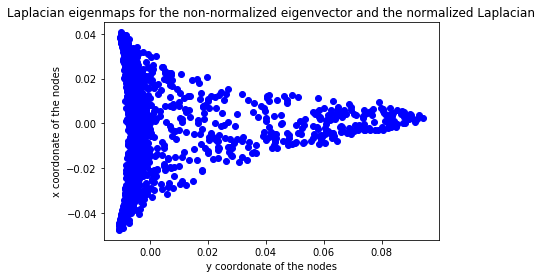

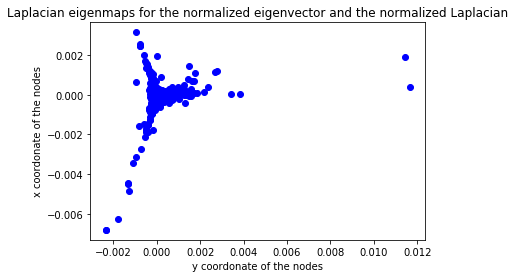

In [27]:
plt.figure(0)
plt.plot(Z[:,1],Z[:,0],'bo') #We invert the x and y data in order it look like what we get in the milestone 1 (with gephi)
plt.xlabel('y coordonate of the nodes')
plt.ylabel('x coordonate of the nodes')
plt.title('Laplacian eigenmaps for the non-normalized eigenvector and the normalized Laplacian')

plt.figure(1)
plt.plot(Z_norm[:,1],Z_norm[:,0],'bo')
plt.xlabel('y coordonate of the nodes')
plt.ylabel('x coordonate of the nodes')
plt.title('Laplacian eigenmaps for the normalized eigenvector and the normalized Laplacian')

**We can clearly see two parts in our embedded graph. A compact part on one side and a more expanded one on the other. These two parts can indicate that we have two clusters which is what we expect to get because we have rock and hip-hop tracks in our case, we will see in the next section if these clusters really are what we expect. If we compare with what we get with Gephi in the first milestone, we can clearly see the similarity. We can see that in our case, we have better results with the non-normalized eigenvectors.**

### Question 9

What does the embedding $Z \in \mathbb{R}^{N \times d}$ preserve?

**It preserves the distance between the nodes. As we preserve the distance between the nodes, we also preserve the cluster that we can get with the kMeans algorithm (see next section).**

## 2 Spectral clustering

*Spectral clustering* is a method to partition a graph into distinct clusters.
The method associates a feature vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$, then runs [$k$-means](https://en.wikipedia.org/wiki/K-means_clustering) in the embedding space $\mathbb{R}^d$ to assign each node $v_i \in \mathcal{V}$ to a cluster $c_j \in \mathcal{C}$, where $k = |\mathcal{C}|$ is the number of desired clusters.

### Question 10

Choose $k$ and $d$. How did you get to those numbers?

**As we have seen before, we only kept two genres in our graph, we therefore should have two clusters in our graph so we chose k=2. Then we chose to take d=2 too because we want to see the result on a 2D embedded graph. As we have already done all the calculations for the embedding in 2D in question 8, we will simply use what we got for the embedding graph.**

### Question 11

1. Embed your graph in $\mathbb{R}^d$ as $Z \in \mathbb{R}^{N \times d}$.
   Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.
1. If you want $k=2$ clusters, partition with the Fiedler vector. For $k > 2$ clusters, run $k$-means on $Z$. Don't implement $k$-means, use the `KMeans` class imported from scikit-learn.

In [14]:
#For the first point, as we have already done the embedding in 2D in the question 8, we will directly use this one.
#We have seen that the embeding with non-normalized eigenvector is better than the one with normalized eigenvector so
#we choose to keep the embending with non-normalized eigenvector.

#For the second point, we can directly use the embeding as Z. As we choosed to have d=2, we will not only use the fiedler
#vector but also the third eigenvector so we can directly take the Z create in the question 8.

#We tried to partition with the Fiedler Vector but we was not very happy of the aspect of the result so we choose to use
#the kMeans algorithme in order to have a more coherent result (even if we have k=2).

Kmeans = KMeans(n_clusters=2,random_state=0).fit(Z) #We use directly the KMeans given by scikit-learn

cluster = Kmeans.labels_


#Here we have tried to compute the clusters with the Fiedler vector :

#cluster = np.zeros(n_nodes)

#for i in range(0,n_nodes):
#    if eigenvector[i,2] < 0:
#        cluster[i] = 0
#    else:
#        cluster[i] = 1


### Question 12

Use the computed cluster assignment to reorder the adjacency matrix $A$.
What do you expect? What do you observe?

In [15]:
n_cluster = 0

#We first compute the number of element in the cluster numbered "0"
for i in range(0,(n_nodes)):
    if cluster[i]==0:
        n_cluster=n_cluster+1

#We create some new variable for the reorder of our elements
adjacency_reorder = adjacency.copy()   
cluster_reorder = cluster.copy()
Z_reorder = Z.copy()
 
#We intantiate some variable in order to count the number of element which are not in the good place
k1=0
k2=0

#We instantiate some variable in order to register the indices of the element which are not at the good place
#The size of this element should large enough in case that all the element check are not at the good place
IndDiffClust1 = np.zeros(n_cluster,dtype=int)
IndDiffClust2 = np.zeros(n_nodes-n_cluster,dtype=int)
 
#We assume that the n_cluster first element of our cluster vector are in the cluster numbered "0". 
#We check here each element for the cluster numbered "0". The number of element which are not at the 
#good place in this first n_cluster element is the same than the number of element which are not at 
#the good place in the last part of the cluster vector. We register here the indices of the elements 
#which are not at the good place using the incrementation of k1.
for i in range(0,(n_cluster)):
    if cluster[i]!=0:
        IndDiffClust1[k1] = i
        k1 = k1+1

#Here we check the last part of the cluster vector. If the element are not in the cluster "1", we count 
#it and register the indices of the element using the incrementation of k2.
for i in range(n_cluster,n_nodes):
    if cluster[i]!=1:
        IndDiffClust2[k2] = i
        k2 = k2+1

#Now that we have the indices of the element which are not correclty placed for both of the clusters,
#we can swap the vector associated and then the element are correctly placed.
for i in range(0,k1):
    adjacency_reorder[IndDiffClust1[i],:] = adjacency[IndDiffClust2[i],:]
    adjacency_reorder[IndDiffClust2[i],:] = adjacency[IndDiffClust1[i],:]
    
    adjacency_reorder[:,IndDiffClust1[i]] = adjacency[:,IndDiffClust2[i]]
    adjacency_reorder[:,IndDiffClust2[i]] = adjacency[:,IndDiffClust1[i]]
    
    cluster_reorder[IndDiffClust1[i]] = cluster[IndDiffClust2[i]]
    cluster_reorder[IndDiffClust2[i]] = cluster[IndDiffClust1[i]]
    
    Z_reorder[IndDiffClust1[i],:] = Z[IndDiffClust2[i],:]
    Z_reorder[IndDiffClust2[i],:] = Z[IndDiffClust1[i],:]


In [16]:
n_cluster  #number of element in the cluster numbered "0"

1772

In [17]:
n_nodes-n_cluster  #number of element in the cluster numbered "1"

216

In [18]:
k1 #k1 is the number of element to swap for the cluster numbered "0"

206

In [19]:
k2 #k2 is the number of element to swap for the cluster numbered "1"

#k1 and k2 should be the same as we swap the element which are not correct for the cluster "0"
#with the element which are not correct for the cluster "1". This is what we see here.

206

**For this part, we expected to have two cluster with pratically the same size (as we have around 1000 element with genre Rock and 1000 element witht the genre Hip-Hop). But in fact, we can clearly see here that we have one big cluster and the other one is very small in comparison. We will explain why we don't have what we expected in the next question. For the moment we can see that the 2D embeding of our graph is in fact really dense even two part seems to appear. It's so really hard, even impossible, to get two beautifull cluster from this kind of embeding graph. Some solution for this would be to have a more precise algorithme for the clusters or maybe to take more degrees for the embeding in order to get maybe more information and clearly see the different cluster. But in our case, with only two dimensions, it's hard to have the cluster we expected.**

### Question 13

If you have ground truth clusters for your dataset, compare the cluster assignment from spectral clustering to the ground truth.
A simple quantitative measure is to compute the percentage of nodes that have been correctly categorized.
If you don't have a ground truth, qualitatively assess the quality of the clustering.

Ground truth clusters are the "real clusters".
For example, the genre of musical tracks in FMA, the category of Wikipedia articles, the spammer status of individuals, etc.
Look for the `labels` in the [dataset descriptions](https://github.com/mdeff/ntds_2018/tree/master/projects/README.md).

In [20]:
#As we register the Hip-Hop node on the first half of the adjacency matrix and the Rock node on the second half (which is
#a good approximation because we have only extract 12 isolated element), we will check the number of nodes which are not
#correctly placed assuming first that the Hip_Hop is the cluster "0" and the Rock is the cluster "1" and then assuming the 
#inverse (Hip-Hop is the cluster "1" and Rock is the cluster "0").

k_HH1R0 = 0  #Counter of element which are not in correct cluster for Hip-Hop associated to cluster "1" and Rock to cluster "0"
k_HH0R1 = 0  #Counter of element which are not in correct cluster for Hip-Hop associated to cluster "0" and Rock to cluster "1"

n_half = int(n_nodes/2)  #HIndice of the half of the graph

#Counting the number of element in the wrong cluster for Hip-Hop when it is associated to the cluster "1"
for i in range(0,n_half):
    if cluster[i]!=1:
        k_HH1R0 = k_HH1R0+1
        
#Counting the number of element in the wrong cluster for Rock when it is associated to the cluster "0"       
for i in range(n_half,n_nodes):
    if cluster[i]!=0:
        k_HH1R0 = k_HH1R0+1
        
#Counting the number of element in the wrong cluster for Hip-Hop when it is associated to the cluster "0"      
for i in range(0,n_half):
    if cluster[i]!=0:
        k_HH0R1 = k_HH0R1+1
        
#Counting the number of element in the wrong cluster for Rock when it is associated to the cluster "1"         
for i in range(n_half,n_nodes):
    if cluster[i]!=1:
        k_HH0R1 = k_HH0R1+1
        
p_HH1R0 = k_HH1R0/n_nodes*100 #compute the percent of error for Hip-Hop associated to cluster "1" and Rock to cluster "0"
p_HH0R1 = k_HH0R1/n_nodes*100 #compute the percent of error for Hip-Hop associated to cluster "0" and Rock to cluster "1"

In [21]:
p_HH1R0

45.67404426559356

In [22]:
p_HH0R1

54.32595573440644

**As we can see it for both of the percentage of error, we have pratically the maxium of possible error. We can then assume that the cluster that we get are not corroleted to the genre. We see anyway that the associated cluster should be Hip-Hop to cluster "1" and Rock to cluster "0" in our case. In fact as we have allready say it, the nodes of our graph are too close and we can't see correctly the clusters associated to the genre of the musics with this kind of algorithme and this kind of dimensions. Our graph is too dense to use correctly the KMeans algorithme. If we plot the 2D embeding with a separation between the genre, we can see that the nodes associated to the genre are to close between the genre to have a correct used of the kMeans algorithme even if we can clearly see that there's a difference between the genre in the 2D embeded graph. Here's the graph with the diffrence between the genres:**

Text(0.5, 1.0, 'Laplacian eigenmaps with the difference between the genres')

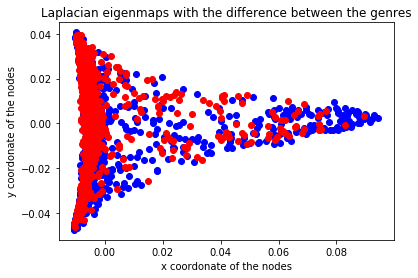

In [23]:
plt.figure(3)
plt.plot(Z[:n_half,1],Z[:n_half,0],'bo') #Hip-Hop part draw in blue
plt.plot(Z[n_half:,1],Z[n_half:,0],'ro') #Rock part draw in red
plt.xlabel('x coordonate of the nodes')
plt.ylabel('y coordonate of the nodes')
plt.title('Laplacian eigenmaps with the difference between the genres')

### Question 14

Plot the cluster assignment (one color per cluster) on the 2D embedding you computed above with Laplacian eigenmaps.

Text(0.5, 1.0, 'Laplacian eigenmaps with the difference between the clusters create with kMeans')

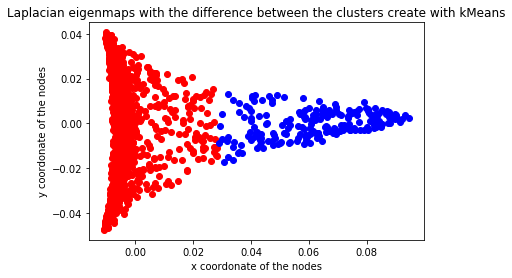

In [24]:
#As we have create a reorder Z (called Z_reorder) with the n_cluster first element in the cluster "0" and the other element 
#in the cluster "1", we can directly use this "Z_reorder" in order to assign one color per cluster.

plt.figure(4)
plt.plot(Z_reorder[:n_cluster,1],Z_reorder[:n_cluster,0],'ro') #plot the cluster "0" in red as the Rock before
plt.plot(Z_reorder[n_cluster:,1],Z_reorder[n_cluster:,0],'bo') #plot the cluster "1" in blue as the Hip-Hop before
plt.xlabel('x coordonate of the nodes')
plt.ylabel('y coordonate of the nodes')
plt.title('Laplacian eigenmaps with the difference between the clusters create with kMeans')

**Here we can see again that the cluster are visually good if we compare with the 2D embeded graph with a separation between the genres. In fact, in our case, the kMeans algorithme use like we have done don't give a good information if we just look at the cluster placement because we have a very dense part in our 2D embeded graph is some Hip-Hop and Rock nodes. Because of this very dense part, as the algorithme of kMeans just look at the posisition, we have a bad clustering in comparison to the separation between the genres. In fact if we can have choose the number of element in each cluster, we propabily would have seen two better cluster really close to the cluster we expected with the separation between the Rock and the Hip-Hop.**

### Question 15

Why did we use the eigenvectors of the graph Laplacian as features? Could we use other features for clustering?

**We use the eigenvoector of the Laplacian because the Laplacian give an information on the variation in the graph and the eigenvector to so we have the indication of the variation between the node. The eigenvector directly give an information about the distance between the node so if we use two eigenvector we can have a 2D representation of the node with a correct representation of the distance between the nodes. With this correct representation of the distances, we can find the cluster. We could have use direclty the distance compute in the milestone 1 in order to find the clusters.**